In [2]:
from keras.layers import Input, Dense
from keras.models import Model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
datadir = '/Users/sidv88/Documents/Data_Management_2/Data/'
train_data = pd.read_csv(datadir + 'train_rgb.csv')
test_data = pd.read_csv(datadir + 'test_rgb.csv')
print(train_data.shape)
print(test_data.shape)

(50000, 3074)
(10000, 3074)


In [4]:
train_data.head()

,Class,Class Name,0,1,2,3,4,5,6,7,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,6,frog,59,62,63,43,46,45,50,48,...,104,216,184,140,151,118,84,123,92,72
1,9,truck,154,177,187,126,137,136,105,104,...,136,143,133,139,143,134,142,143,133,144
2,9,truck,255,255,255,253,253,253,253,253,...,79,78,85,83,79,85,83,80,86,84
3,4,deer,28,25,10,37,34,19,38,35,...,38,54,47,28,63,56,37,72,65,46
4,1,automobile,170,180,198,168,178,196,177,185,...,78,75,79,82,71,75,78,73,77,80


In [5]:
test_data.head()

,Class,Class Name,0,1,2,3,4,5,6,7,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,3,cat,158,112,49,159,111,47,165,116,...,145,24,77,124,34,84,129,21,67,110
1,8,ship,235,235,235,231,231,231,232,232,...,163,168,183,178,180,195,191,186,200,199
2,8,ship,158,190,222,158,187,218,139,166,...,37,5,6,8,4,5,3,7,8,7
3,0,airplane,155,156,149,167,176,187,176,179,...,53,60,63,50,64,65,52,73,68,50
4,6,frog,65,68,50,70,81,64,48,64,...,147,143,179,136,154,185,146,128,156,117


In [6]:
x_train = train_data.iloc[:, 2:]
print(x_train.shape)
y_train = train_data.iloc[:, [0, 1]]
print(y_train.shape)

(50000, 3072)
(50000, 2)


In [7]:
x_test = test_data.iloc[:, 2:]
print(x_test.shape)
y_test = test_data.iloc[:, [0, 1]]
print(y_test.shape)

(10000, 3072)
(10000, 2)


In [8]:
x_train = np.array(x_train)
x_test = np.array(x_test)

In [9]:
print(x_train.shape)
print(x_test.shape)

(50000, 3072)
(10000, 3072)


In [10]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
print(x_train.shape)
print(x_test.shape)

(50000, 3072)
(10000, 3072)


In [11]:
input_img = Input(shape = (3072, ))
encoded = Dense(units = 128, activation = 'relu')(input_img)
encoded = Dense(units = 128, activation = 'relu')(encoded)
encoded = Dense(units = 64, activation = 'relu')(encoded)
encoded = Dense(units = 64, activation = 'relu')(encoded)
encoded = Dense(units = 32, activation = 'relu')(encoded)
decoded = Dense(units = 64, activation = 'relu')(encoded)
decoded = Dense(units = 64, activation = 'relu')(decoded)
decoded = Dense(units = 128, activation = 'relu')(decoded)
decoded = Dense(units = 128, activation = 'relu')(decoded)
decoded = Dense(units = 3072, activation = 'tanh')(decoded)

In [12]:
autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)

In [13]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               393344    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                2112

In [14]:
encoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               393344    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
Total params: 424,352
Trainable params: 424,352
Non-trainable params: 0
_____________________________________________________

In [15]:
autoencoder.compile(optimizer = 'adadelta', loss = 'binary_crossentropy', metrics = ['accuracy'])
autoencoder.fit(x_train, x_train, epochs = 50, batch_size = 256, shuffle = True, validation_data = [x_test, x_test])

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 14s 279us/step - loss: 2.2627 - accuracy: 0.0087 - val_loss: 2.2123 - val_accuracy: 0.0094
Epoch 2/50
50000/50000 [==============================] - 14s 273us/step - loss: 2.1975 - accuracy: 0.0089 - val_loss: 2.2115 - val_accuracy: 0.0094
Epoch 3/50
50000/50000 [==============================] - 14s 271us/step - loss: 2.1140 - accuracy: 0.0090 - val_loss: 1.9085 - val_accuracy: 0.0096
Epoch 4/50
50000/50000 [==============================] - 13s 269us/step - loss: 1.8600 - accuracy: 0.0095 - val_loss: 1.8491 - val_accuracy: 0.0093
Epoch 5/50
50000/50000 [==============================] - 13s 270us/step - loss: 1.8357 - accuracy: 0.0094 - val_loss: 1.8238 - val_accuracy: 0.0094
Epoch 6/50
50000/50000 [==============================] - 13s 270us/step - loss: 1.6865 - accuracy: 0.0097 - val_loss: 1.5532 - val_accuracy: 0.0103
Epoch 7/50
50000/50000 [==============================] 

In [16]:
encoded_test_data = encoder.predict(x_test)
predicted_test_data = autoencoder.predict(x_test)

In [17]:
encoded_test_data.shape

(10000, 32)

In [18]:
y_test

,Class,Class Name
0,3,cat
1,8,ship
2,8,ship
3,0,airplane
4,6,frog
...,...,...
9995,8,ship
9996,3,cat
9997,5,dog
9998,1,automobile


In [19]:
encoded_test_data_df = pd.DataFrame(encoded_test_data)
final_encoded_test_data_df = pd.concat([y_test, encoded_test_data_df], axis = 1)
final_encoded_test_data_df.shape

(10000, 34)

In [20]:
datadir = '/Users/sidv88/Documents/Data_Management_2/Deep_Encoded_Data/'
final_encoded_test_data_df.to_csv(datadir + 'Deep_Encoders_Test_RTADB.csv', index = False)

In [21]:
input_val = input("Enter one of these values {} : ".format(final_encoded_test_data_df['Class Name'].unique()))

Enter one of these values ['cat' 'ship' 'airplane' 'frog' 'automobile' 'truck' 'dog' 'horse' 'deer'
 'bird'] : bird


In [22]:
input_num = input("Enter a number between 0 and 999 : ")

Enter a number between 0 and 999 : 6


In [23]:
from numpy import dot
from numpy.linalg import norm

cosine_similarity = []
cosine_distance = []

for i in range(len(x_test)):
    a = final_encoded_test_data_df.loc[final_encoded_test_data_df['Class Name'] == input_val].iloc[int(input_num), 2:]
    b = final_encoded_test_data_df.iloc[i, 2:]
    cos_sim = dot(a, b)/(norm(a) * norm(b))
    cos_dist = 1 - cos_sim
    cosine_similarity.append(cos_sim)
    cosine_distance.append(cos_dist)
print(len(cosine_similarity))
print(len(cosine_distance))

10000
10000


In [24]:
final_encoded_test_data_df['Cosine Similarity'] = cosine_similarity
final_encoded_test_data_df['Cosine Distance'] = cosine_distance

In [25]:
final_encoded_test_data_df.sort_values(by = ['Cosine Similarity'], ascending = False)

,Class,Class Name,0,1,2,3,4,5,6,7,...,24,25,26,27,28,29,30,31,Cosine Similarity,Cosine Distance
84,2,bird,0.0,0.641000,1.722471,2.982144,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,12.075993,0.000000,0.0,0.0,0.0,1.000000,-1.192093e-07
9531,6,frog,0.0,0.388245,1.331165,1.933466,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,8.065319,0.000000,0.0,0.0,0.0,0.999421,5.786419e-04
7983,6,frog,0.0,0.232990,1.019355,1.775905,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,7.943687,0.000000,0.0,0.0,0.0,0.999421,5.789995e-04
4233,9,truck,0.0,0.063107,0.940228,1.525557,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,6.510340,0.000000,0.0,0.0,0.0,0.999375,6.245375e-04
9478,7,horse,0.0,0.604019,1.511044,2.193748,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,8.978961,0.000000,0.0,0.0,0.0,0.999371,6.292462e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,2,bird,0.0,0.393471,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.171784,0.000000,0.561787,0.0,0.0,0.0,0.224464,7.755356e-01
7794,5,dog,0.0,1.220920,0.312504,0.000000,0.0,0.0,0.0,0.0,...,0.016794,0.0,0.000000,0.039673,1.064195,0.0,0.0,0.0,0.154354,8.456463e-01
2754,9,truck,0.0,1.656096,0.445421,0.000000,0.0,0.0,0.0,0.0,...,0.223440,0.0,0.000000,0.000000,1.418960,0.0,0.0,0.0,0.132832,8.671685e-01
6885,0,airplane,0.0,0.504858,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.604813,0.0,0.0,0.0,0.125656,8.743440e-01


In [26]:
cosine_index = final_encoded_test_data_df.sort_values(by = ['Cosine Similarity'], ascending = False).head(10).index

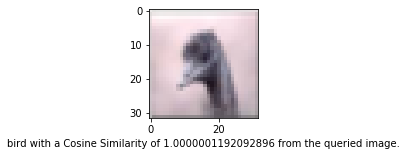

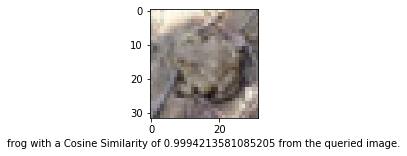

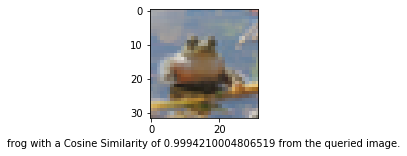

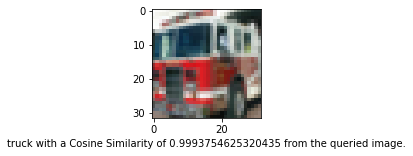

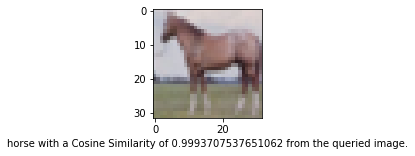

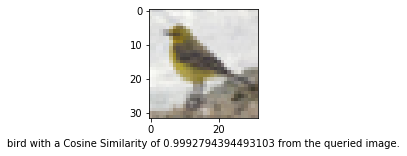

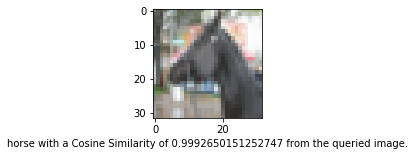

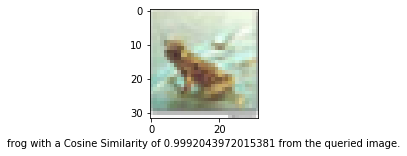

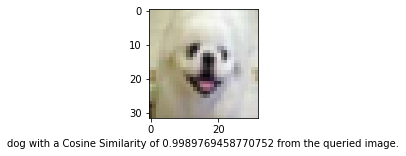

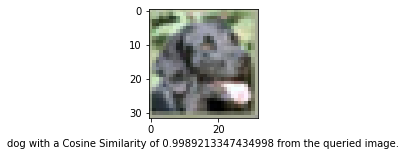

In [27]:
for i in cosine_index:
    plt.figure(figsize = (2, 2))
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.xlabel(final_encoded_test_data_df['Class Name'][i] + ' with a Cosine Similarity of ' + str(final_encoded_test_data_df['Cosine Similarity'][i]) + ' from the queried image.')
    plt.show()

In [28]:
euclidean_distance = []

for i in range(len(x_test)):
    a = final_encoded_test_data_df.loc[final_encoded_test_data_df['Class Name'] == input_val].iloc[int(input_num), 2:]
    b = final_encoded_test_data_df.iloc[i, 2:]
    euc_dist = np.linalg.norm(a-b)
    euclidean_distance.append(euc_dist)
print(len(euclidean_distance))

10000


In [29]:
final_encoded_test_data_df['Euclidean Distance'] = euclidean_distance
final_encoded_test_data_df.sort_values(by = ['Euclidean Distance'])

,Class,Class Name,0,1,2,3,4,5,6,7,...,25,26,27,28,29,30,31,Cosine Similarity,Cosine Distance,Euclidean Distance
84,2,bird,0.0,0.641000,1.722471,2.982144,0.0,0.0,0.000000,0.000000,...,0.00000,0.000000,12.075993,0.000000,0.0,0.0,0.0,1.000000,-1.192093e-07,0.000000
4880,0,airplane,0.0,0.454499,1.373233,2.615969,0.0,0.0,0.000000,0.025662,...,0.00000,0.000000,12.291200,0.000000,0.0,0.0,0.0,0.998556,1.443982e-03,1.062193
8747,2,bird,0.0,0.925103,2.041713,2.979914,0.0,0.0,0.000000,0.000000,...,0.00000,0.000000,11.520736,0.000000,0.0,0.0,0.0,0.999279,7.205606e-04,1.117324
7428,0,airplane,0.0,0.126550,1.144415,2.927333,0.0,0.0,0.000000,0.000000,...,0.00000,0.000000,11.783887,0.000000,0.0,0.0,0.0,0.998408,1.591742e-03,1.167322
6055,0,airplane,0.0,0.888235,1.567524,3.228534,0.0,0.0,0.000000,0.000000,...,0.00000,0.000000,12.653184,0.000000,0.0,0.0,0.0,0.998048,1.951933e-03,1.191574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7794,5,dog,0.0,1.220920,0.312504,0.000000,0.0,0.0,0.000000,0.000000,...,0.00000,0.000000,0.039673,1.064195,0.0,0.0,0.0,0.154354,8.456463e-01,18.905436
2754,9,truck,0.0,1.656096,0.445421,0.000000,0.0,0.0,0.000000,0.000000,...,0.00000,0.000000,0.000000,1.418960,0.0,0.0,0.0,0.132832,8.671685e-01,18.941738
6885,0,airplane,0.0,0.504858,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.604813,0.0,0.0,0.0,0.125656,8.743440e-01,18.995594
6941,4,deer,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.059526,0.0,0.0,0.0,0.122164,8.778359e-01,19.077049


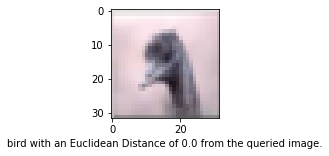

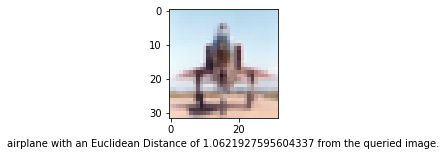

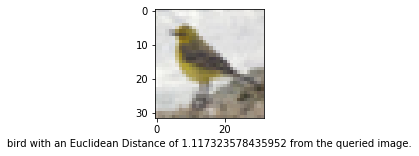

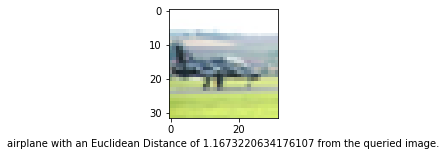

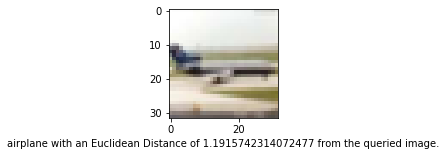

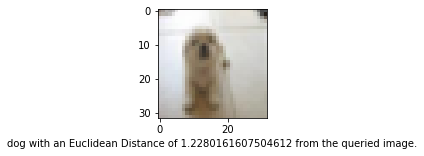

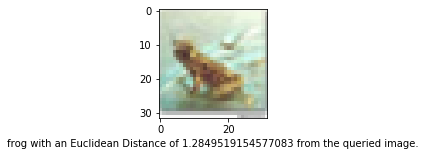

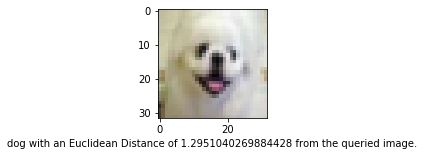

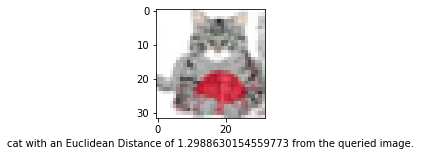

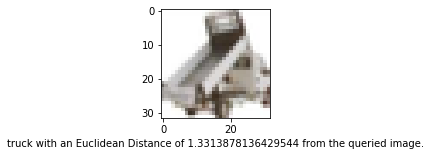

In [30]:
euclidean_index = final_encoded_test_data_df.sort_values(by = ['Euclidean Distance']).head(10).index

for i in euclidean_index:
    plt.figure(figsize = (2, 2))
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.xlabel(final_encoded_test_data_df['Class Name'][i] + ' with an Euclidean Distance of ' + str(final_encoded_test_data_df['Euclidean Distance'][i]) + ' from the queried image.')
    plt.show()